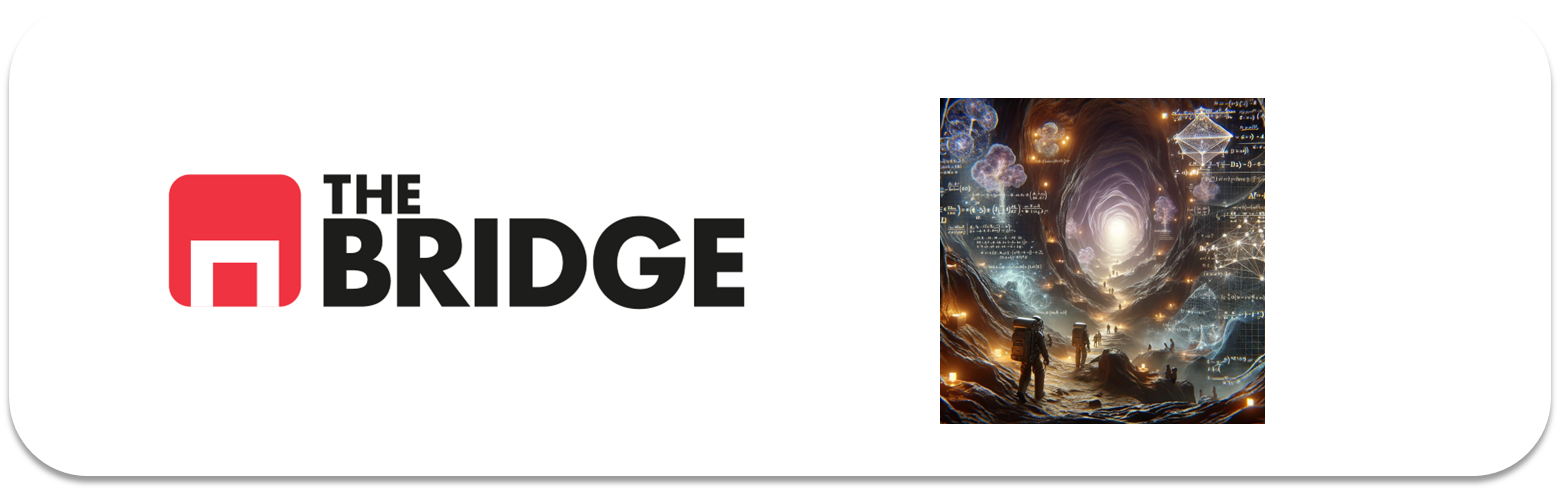

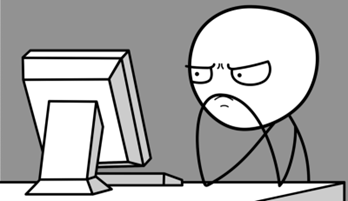

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [4]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.meta


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Ejercicio 1

Carga los datos en un dataframe, utilizando como nombre de columnas los siguientes:

```python
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
``` 


In [5]:
import pandas as pd

# Nombre de las columnas proporcionado
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

# Cargar el conjunto de datos en un dataframe con el delimitador correcto (tabulación)
df = pd.read_csv('./data/Autos_data.txt', names=column_names, header=None, na_values='?', sep='\s+')

# Ver los primeros registros para inspeccionar el dataframe
df.head()


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\conch\AppData\Local\Temp\ipykernel_15484\4067081928.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('./data/Autos_data.txt', names=column_names, header=None, na_values='?', sep='\s+')


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [6]:
# Verificar los valores nulos
df.isnull().sum()

# Eliminar filas con valores nulos
df = df.dropna()

# Verificar el tipo de las columnas
df.dtypes

# Convertir las columnas numéricas a su tipo adecuado
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df['Cylinders'] = df['Cylinders'].astype(int)
df['Displacement'] = df['Displacement'].astype(float)
df['Weight'] = df['Weight'].astype(float)
df['Acceleration'] = df['Acceleration'].astype(float)
df['Model Year'] = df['Model Year'].astype(int)
df['Origin'] = df['Origin'].astype(int)

# Ver el dataframe limpio
df.head()


ValueError: invalid literal for int() with base 10: 'chevrolet chevelle malibu'

### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si nos los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [7]:
# Convertir la columna 'Origin' a sus respectivos valores literales
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

# Realizar One-Hot Encoding de 'Origin'
df = pd.get_dummies(df, columns=['Origin'], drop_first=True)

# Ver el dataframe después del one-hot encoding
df.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
18.0,8,307,130.0,3504.0,12.0,70.0,1
15.0,8,350,165.0,3693.0,11.5,70.0,1
18.0,8,318,150.0,3436.0,11.0,70.0,1
16.0,8,304,150.0,3433.0,12.0,70.0,1
17.0,8,302,140.0,3449.0,10.5,70.0,1


### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [8]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y el objetivo (y)
X = df.drop('MPG', axis=1)
y = df['MPG']

# Dividir los datos en un 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver las formas de los datasets
X_train.shape, X_test.shape


((313, 6), (79, 6))

### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

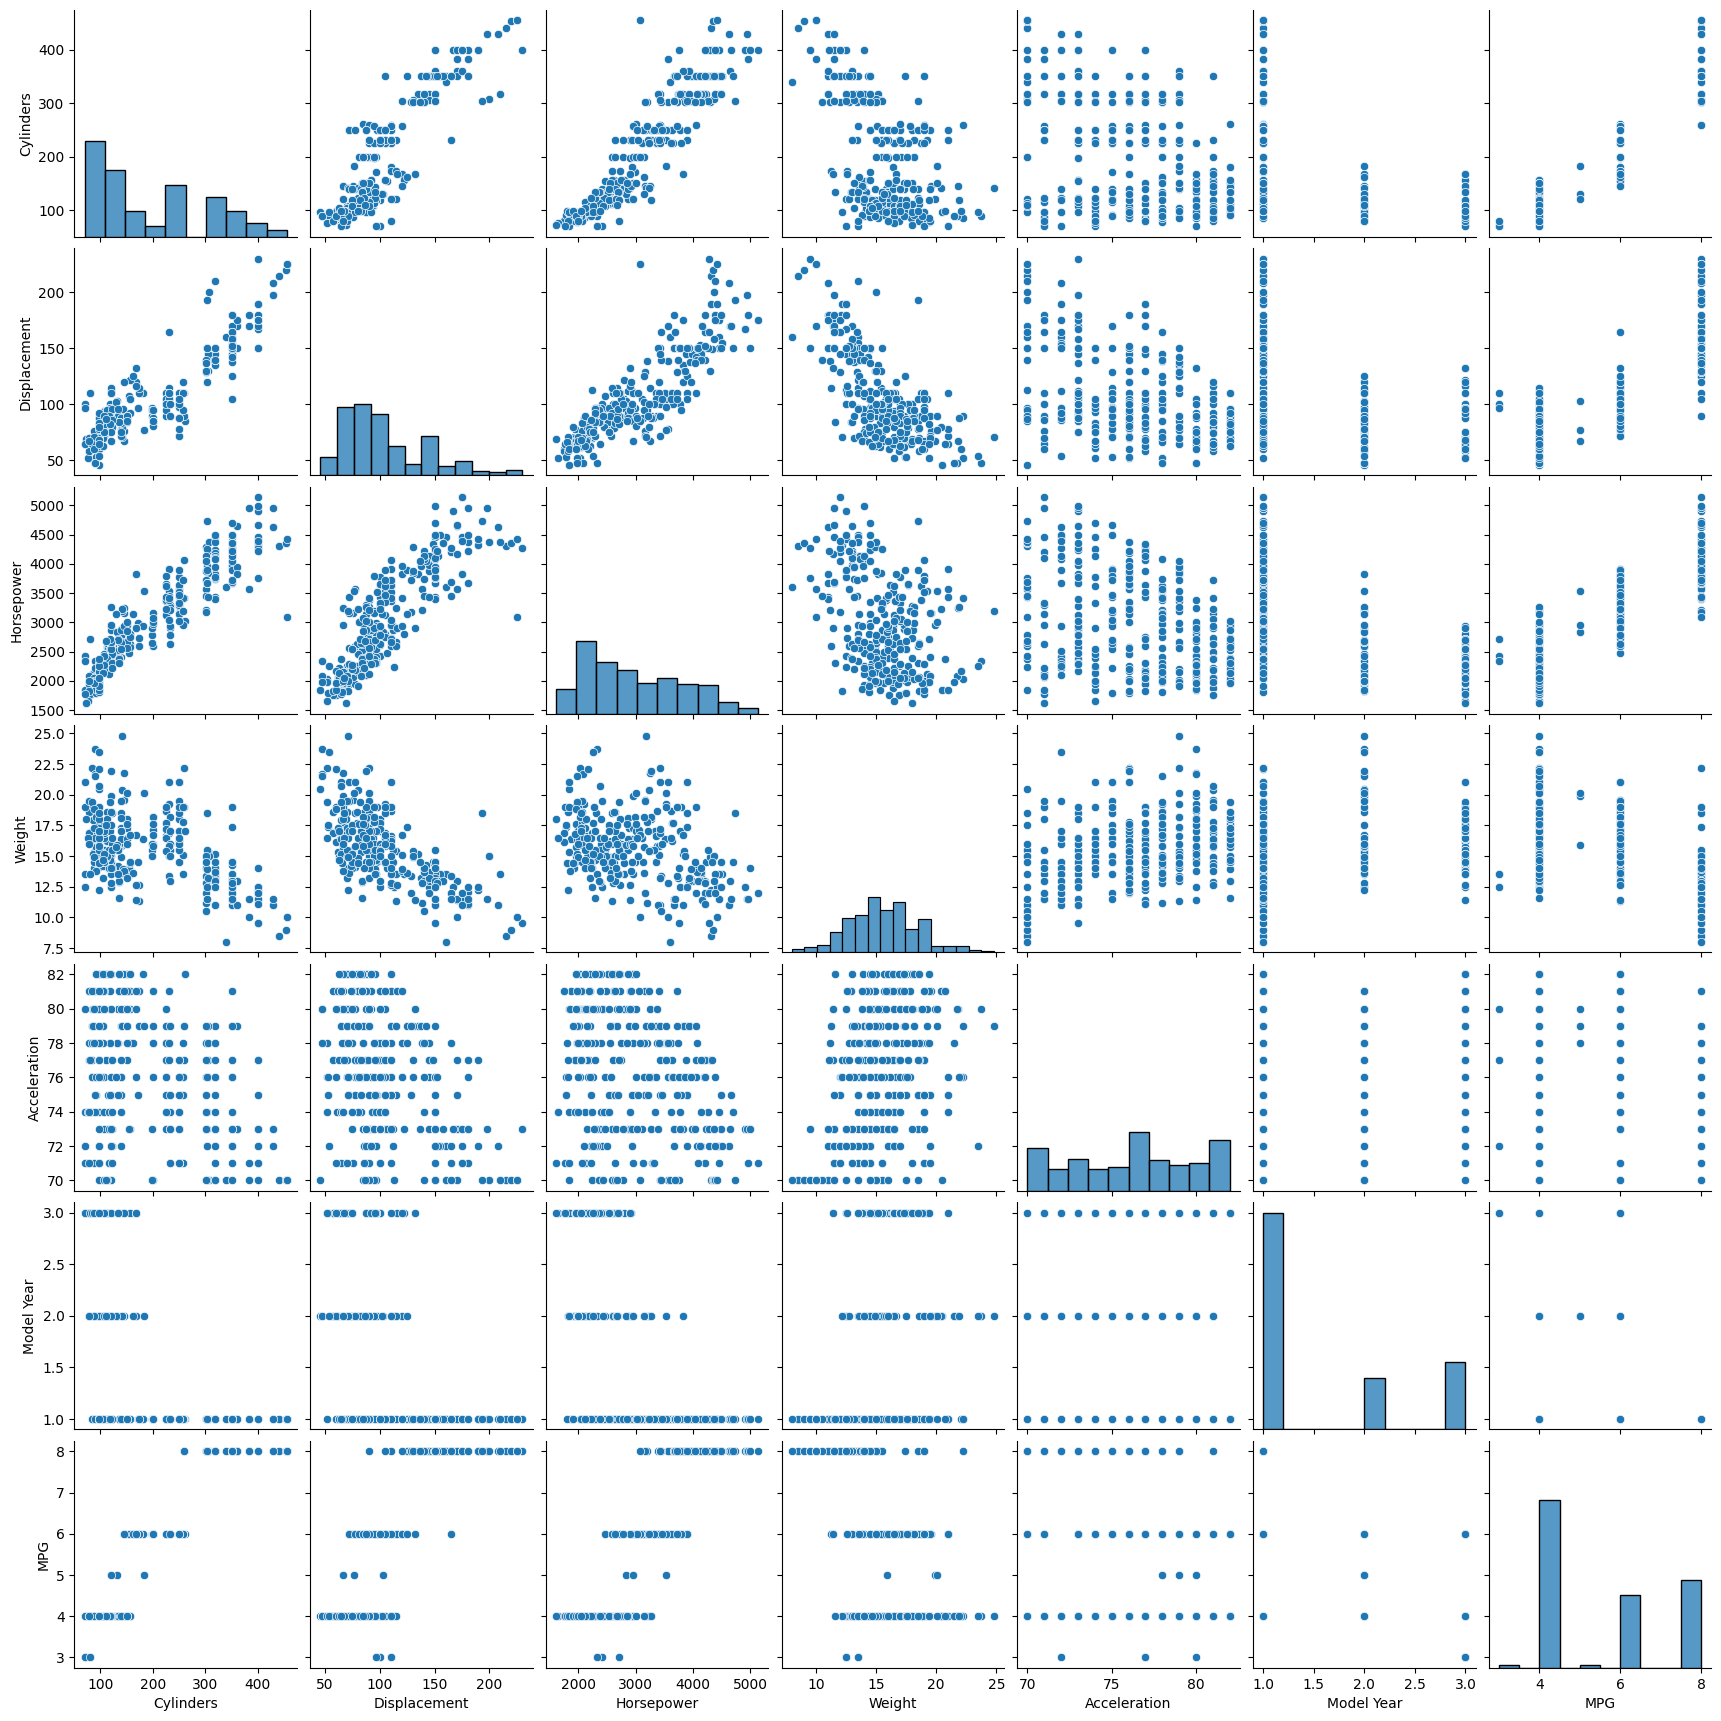

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un grid de gráficos para inspeccionar las distribuciones
sns.pairplot(pd.concat([X_train, y_train], axis=1))
plt.show()


### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [9]:
from sklearn.preprocessing import StandardScaler

# Inicializamos el escalador
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar el conjunto de prueba
X_test_scaled = scaler.transform(X_test)


## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

# Crear el modelo secuencial
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Capa de entrada
    layers.Dense(64, activation='relu'),  # Capa oculta
    layers.Dense(1)  # Capa de salida (valor continuo)
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

# Resumen del modelo
model.summary()


c:\Users\conch\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [11]:
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2)


Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 32.7653 - mae: 5.3988 - mse: 32.7653 - val_loss: 19.7880 - val_mae: 4.1556 - val_mse: 19.7880
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.2567 - mae: 4.2271 - mse: 20.2567 - val_loss: 12.9510 - val_mae: 3.2984 - val_mse: 12.9510
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.6332 - mae: 3.2760 - mse: 12.6332 - val_loss: 7.8720 - val_mae: 2.4586 - val_mse: 7.8720
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.0518 - mae: 2.3412 - mse: 7.0518 - val_loss: 4.5793 - val_mae: 1.7587 - val_mse: 4.5793
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2160 - mae: 1.7060 - mse: 4.2160 - val_loss: 2.9039 - val_mae: 1.3459 - val_mse: 2.9039
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.7395 - mae: 1.3643 - mse: 2.7395 - val_loss: 2.2650 - val_mae: 1.1858 - val_mse: 2.2650
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9596 - mae: 1.1152 - mse: 1.9596 - 

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

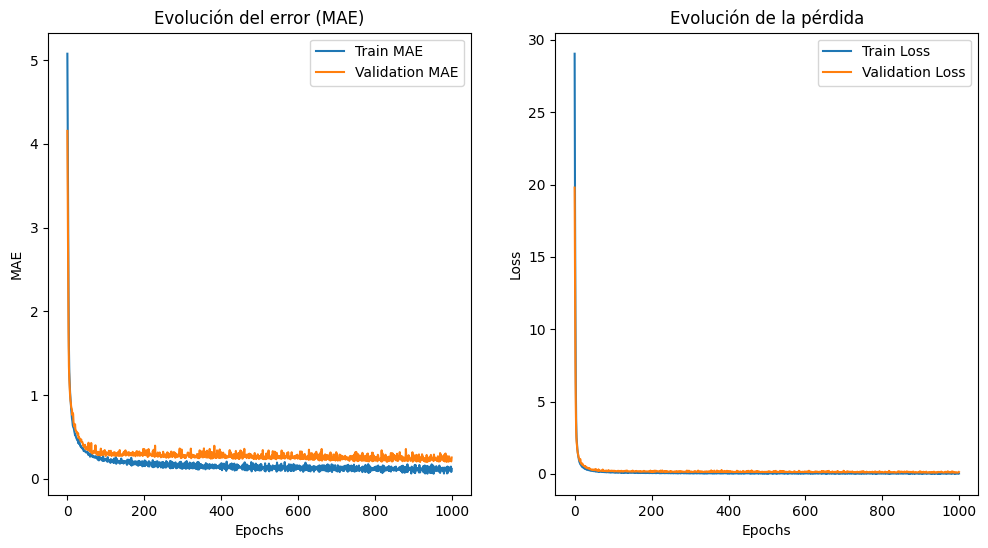

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Graficar la evolución del error y la pérdida
plt.figure(figsize=(12, 6))

# Error (MAE)
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Evolución del error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolución de la pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Ejercicio 11

Comenta las gráficas anteriores.

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar el callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Compilar el modelo nuevamente
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

# Entrenar el modelo con early stopping
history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1039 - mae: 0.2179 - mse: 0.1039 - val_loss: 0.0925 - val_mae: 0.2099 - val_mse: 0.0925
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0121 - mae: 0.0793 - mse: 0.0121 - val_loss: 0.0935 - val_mae: 0.2096 - val_mse: 0.0935
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0138 - mae: 0.0877 - mse: 0.0138 - val_loss: 0.0909 - val_mae: 0.2367 - val_mse: 0.0909
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0214 - mae: 0.1210 - mse: 0.0214 - val_loss: 0.0919 - val_mae: 0.2043 - val_mse: 0.0919
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0147 - mae: 0.0870 - mse: 0.0147 - val_loss: 0.1075 - val_mae: 0.2451 - val_mse: 0.1075
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0250 - mae: 0.1243 - mse: 0.0250 - val_loss: 0.0940 - val_mae: 0.2306 - val_mse: 0.0940
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0342 - mae: 0.1485 - mse: 0.0342 - val_loss: 0

Interpreta el gráfico

### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [15]:
# Evaluar el modelo en el conjunto de test
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test)

# Mostrar los resultados
test_loss, test_mae, test_mse


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1360 - mae: 0.2028 - mse: 0.1360 


(0.17209431529045105, 0.21925435960292816, 0.17209431529045105)

### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


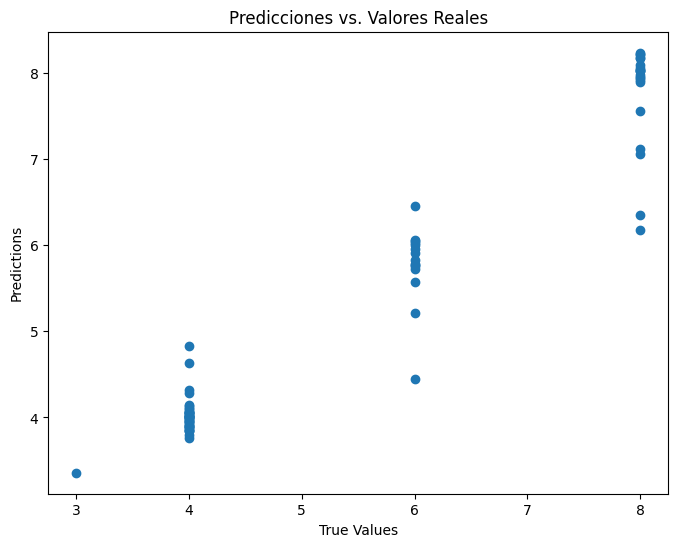

In [16]:
# Obtener las predicciones para el conjunto de test
y_pred = model.predict(X_test_scaled)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicciones vs. Valores Reales')
plt.show()
